In [ ]:
# Marco's Analysis on Athlete demographics

In [21]:
!pip install seaborn

In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
olympic_athletes = pd.read_csv('../../notebooks/Marco/Olympic_athletes_clean.csv')
olympic_athletes

,Unnamed: 0,athlete_id,sex,born,country,edition,country_noc,sport,event,athlete,medal,olympic_year,birth_year,age
0,0,112510,Female,15 March 1977,Russian Federation,2008 Summer Olympics,RUS,Beach Volleyball,"Beach Volleyball, Women",Nataliya Uryadova,NaN,2008,1977.0,31.0
1,1,114973,Male,14 December 1986,Qatar,2008 Summer Olympics,QAT,Athletics,"10,000 metres, Men",Essa Ismail Rashed,NaN,2008,1986.0,22.0
2,2,146111,Female,9 November 1997,ROC,2020 Summer Olympics,ROC,Beach Volleyball,"Beach Volleyball, Women",Svetlana Kholomina,NaN,2020,1997.0,23.0
3,3,133041,Male,13 December 1996,Canada,2016 Summer Olympics,CAN,Diving,"Platform, Men",Vincent Riendeau,NaN,2016,1996.0,20.0
4,4,133041,Male,13 December 1996,Canada,2020 Summer Olympics,CAN,Diving,"Synchronized Platform, Men",Vincent Riendeau,NaN,2020,1996.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178231,178231,74003,Male,22 June 1969,Nigeria,1992 Summer Olympics,NGR,Athletics,"4 × 400 metres Relay, Men",Sunday Bada,NaN,1992,1969.0,23.0
178232,178232,74003,Male,22 June 1969,Nigeria,1996 Summer Olympics,NGR,Athletics,"400 metres, Men",Sunday Bada,NaN,1996,1969.0,27.0
178233,178233,74003,Male,22 June 1969,Nigeria,1996 Summer Olympics,NGR,Athletics,"4 × 400 metres Relay, Men",Sunday Bada,NaN,1996,1969.0,27.0
178234,178234,74003,Male,22 June 1969,Nigeria,2000 Summer Olympics,NGR,Athletics,"400 metres, Men",Sunday Bada,NaN,2000,1969.0,31.0


In [79]:
# Analysis on Age : average age per year (Female/Male/Overall)

table_age_mean = pd.pivot_table(
        olympic_athletes, 
        index='olympic_year', 
        columns='sex', 
        values='age', 
        aggfunc='mean')

# Extra calculation of the overall average
overall_mean_age = olympic_athletes.groupby('olympic_year')['age'].mean()
table_age_mean['Overall'] = overall_mean_age

table_age_mean = table_age_mean.round(2)
table_age_mean

sex,Female,Male,Overall
olympic_year,,,
1984,22.36,25.02,24.33
1988,22.80,25.12,24.43
1992,23.50,25.49,24.86
1994,24.34,25.79,25.28
1996,24.08,26.03,25.32
1998,25.21,26.60,26.06
2000,24.76,26.26,25.67
2002,26.00,27.27,26.78
2004,25.15,26.53,25.96


In [112]:
# Analysis on Age : average age in the last Olympic Games (Female/Male)

age_mean = pd.pivot_table(olympic_athletes, index='sex', values='age', aggfunc='mean')

age_mean = total_age_mean.round(2)
age_mean

,age
sex,
Female,24.96
Male,26.30


In [113]:
# Analysis on Age : average age in the last Olympic Games (Female/Male)

age_mean_total = olympic_athletes['age'].mean()

age_mean_total

np.float64(25.77681276509796)

<Axes: xlabel='age', ylabel='Count'>

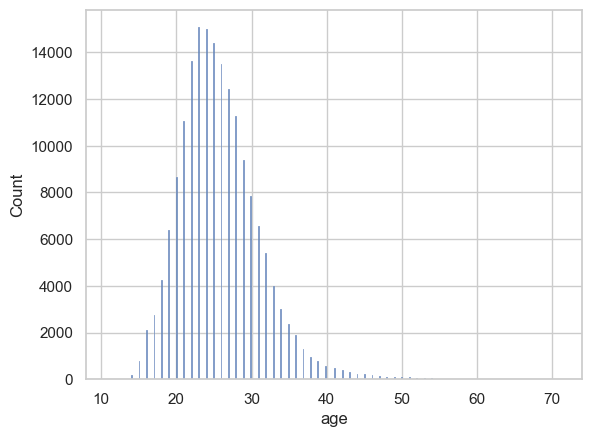

In [55]:

sns.histplot(x='age', data=olympic_athletes)

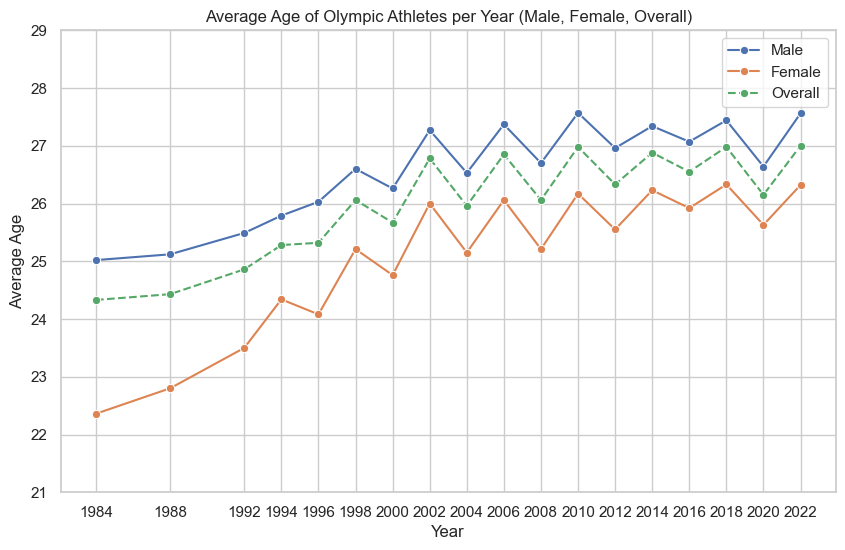

In [82]:
# Save the pivot table data to a new DataFrame
avg_age_per_year = table_age_mean.reset_index()  # Resets the index so 'Year' becomes a column

# Plotting the data
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Plotting Male, Female, and Overall average ages
sns.lineplot(data=avg_age_per_year, x='olympic_year', y='Male', marker='o', label='Male')
sns.lineplot(data=avg_age_per_year, x='olympic_year', y='Female', marker='o', label='Female')
sns.lineplot(data=avg_age_per_year, x='olympic_year', y='Overall', marker='o', label='Overall', linestyle='--')

plt.title('Average Age of Olympic Athletes per Year (Male, Female, Overall)')
plt.xlabel('Year')
plt.ylabel('Average Age')

plt.ylim(21, 29)  # Set Y-axis range from 21 to 29
plt.xticks(avg_age_per_year['olympic_year']) 
plt.legend()  # Show legend to distinguish between Male, Female, and Overall lines

plt.show()

In [29]:
# Analysis on Age : min age per year (Female/Male)

total_age_min = pd.pivot_table(olympic_athletes, index='sex', columns="olympic_year", values='age', aggfunc='min')
total_age_min

olympic_year,1984,1988,1992,1994,1996,1998,2000,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020,2022
sex,,,,,,,,,,,,,,,,,,
Female,14.0,12.0,12.0,14.0,13.0,16.0,13.0,16.0,13.0,15.0,13.0,16.0,13.0,16.0,14.0,16.0,11.0,16.0
Male,13.0,13.0,12.0,16.0,14.0,15.0,14.0,16.0,14.0,16.0,14.0,16.0,15.0,16.0,14.0,16.0,14.0,16.0


In [30]:
# Analysis on Age : max age in the last Olympic Games (Female/Male)

age_max = pd.pivot_table(olympic_athletes, index='sex', values='age', aggfunc='max')
age_max

,age
sex,
Female,66.0
Male,71.0


Oldest participants:

Female:
Australia / Equestrian Dressage / 2020 Summer / No medal

Male:
Bahamas / Sailing / 1988 Summer / No medal
Japan / Equestrian Dressage / 2012 Summer / No medal

In [31]:
# Analysis on Age : max age per year (Female/Male)

total_age_min = pd.pivot_table(olympic_athletes, index='sex', columns="olympic_year", values='age', aggfunc='max')
total_age_min

olympic_year,1984,1988,1992,1994,1996,1998,2000,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020,2022
sex,,,,,,,,,,,,,,,,,,
Female,52.0,64.0,53.0,41.0,59.0,45.0,53.0,49.0,57.0,45.0,58.0,47.0,58.0,49.0,62.0,52.0,66.0,50.0
Male,60.0,71.0,63.0,47.0,64.0,51.0,63.0,49.0,57.0,55.0,67.0,51.0,71.0,55.0,61.0,50.0,61.0,48.0


In [32]:
# Analysis on Age : min age in the last Olympic Games (Female/Male)

age_min = pd.pivot_table(olympic_athletes, index='sex', values='age', aggfunc='min')
age_min

,age
sex,
Female,11.0
Male,12.0


Youngest athletes:

Female:
Syria / Table tennis / 2020 Summer / No medal

Male:
Spain / Rowing / 1992 Summer / No medal


In [105]:
# New sub dataframe to count participating athletes by gender per year

unique_athletes = olympic_athletes[['olympic_year', 'sex', 'athlete']]
unique_athletes = unique_athletes.drop_duplicates(subset='athlete')
unique_athletes

,olympic_year,sex,athlete
0,2008,Female,Nataliya Uryadova
1,2008,Male,Essa Ismail Rashed
2,2020,Female,Svetlana Kholomina
3,2016,Male,Vincent Riendeau
5,2006,Female,Tanja Morel
...,...,...,...
178220,2016,Male,Andrius Šidlauskas
178224,2020,Female,Raz Hershko
178226,2000,Male,Vitali Dzerbianiou
178229,1984,Male,Muhaisin Al-Jamaan


In [106]:
# Analysis on Count : count of participating athletes per year (Female/Male/Overall)

table_count = pd.pivot_table(
        unique_athletes, 
        index='olympic_year', 
        columns='sex',
        aggfunc='size')

# Calculation of the overall count
overall_count = unique_athletes.groupby('olympic_year')['sex'].count()
table_count['Overall'] = overall_count

# Calculation of %
female_prct = table_count['Female']/table_count['Overall']*100
table_count['Female %'] = female_prct
male_prct = table_count['Male']/table_count['Overall']*100
table_count['Male %'] = male_prct


table_count = table_count.round(2)
table_count

sex,Female,Male,Overall,Female %,Male %
olympic_year,,,,,
1984,1894,6234,8128,23.30,76.70
1988,2189,5698,7887,27.75,72.25
1992,2617,6029,8646,30.27,69.73
1994,302,655,957,31.56,68.44
1996,2635,4899,7534,34.97,65.03
1998,541,894,1435,37.70,62.30
2000,2882,4332,7214,39.95,60.05
2002,547,862,1409,38.82,61.18
2004,2937,3993,6930,42.38,57.62


In [107]:
def format_with_commas(x):
    return f"{x:,}"

table_count_formatted = table_count.applymap(format_with_commas)
table_count_formatted

/var/folders/23/6fv5c4zd0j7gt5pr6qbdnznh0000gn/T/ipykernel_74829/2543395872.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  table_count_formatted = table_count.applymap(format_with_commas)


sex,Female,Male,Overall,Female %,Male %
olympic_year,,,,,
1984,"1,894","6,234","8,128",23.3,76.7
1988,"2,189","5,698","7,887",27.75,72.25
1992,"2,617","6,029","8,646",30.27,69.73
1994,302,655,957,31.56,68.44
1996,"2,635","4,899","7,534",34.97,65.03
1998,541,894,"1,435",37.7,62.3
2000,"2,882","4,332","7,214",39.95,60.05
2002,547,862,"1,409",38.82,61.18
2004,"2,937","3,993","6,930",42.38,57.62


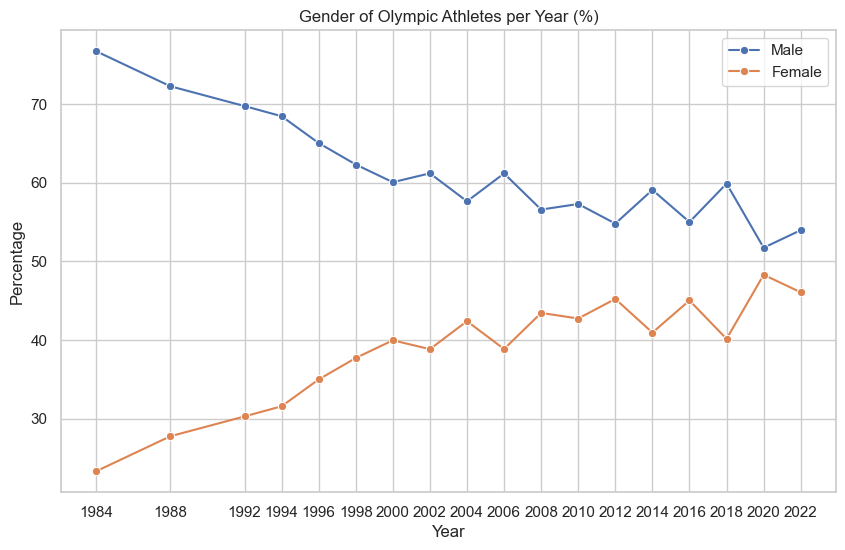

In [108]:
# Save the pivot table data to a new DataFrame
countFM_year = table_count.reset_index()  # Resets the index so 'Year' becomes a column

# Plotting the data
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Plotting Female %, Male %, and Overall average ages
sns.lineplot(data=countFM_year, x='olympic_year', y='Male %', marker='o', label='Male')
sns.lineplot(data=countFM_year, x='olympic_year', y='Female %', marker='o', label='Female')
#sns.lineplot(data=countFM_year, x='olympic_year', y='Overall', marker='o', label='Overall', linestyle='--')

plt.title('Gender of Olympic Athletes per Year (%)')
plt.xlabel('Year')
plt.ylabel('Percentage')

#plt.ylim(21, 29)  # Set Y-axis range from 21 to 29
plt.xticks(countFM_year['olympic_year']) 
plt.legend()  # Show legend to distinguish between Male, Female, and Overall lines

plt.show()

Share (%) of participation from Female and Male athletes.
The overarching trend shows the gap closing. 
The gender gap get narrower faster overtime in Summer Olympics.
From recent reports, Paris 2024 showed almost a 50-50 split.

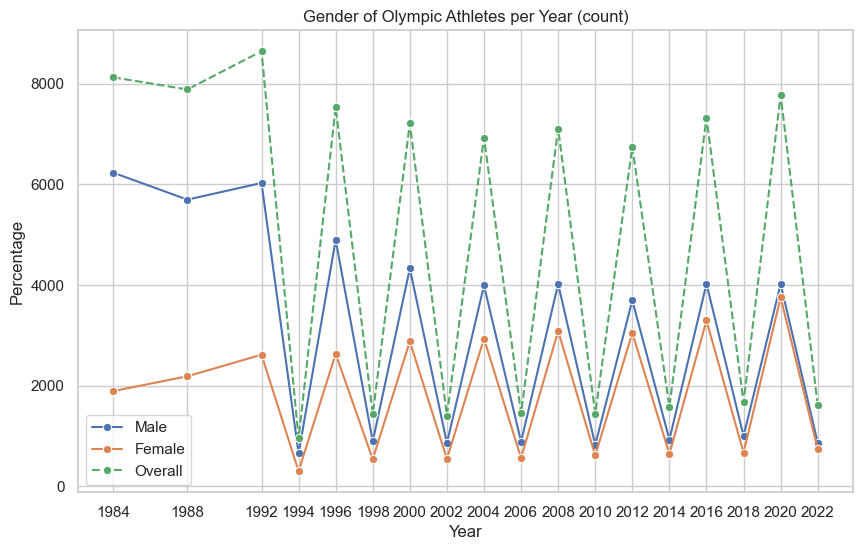

In [109]:
# Save the pivot table data to a new DataFrame
countFM_year = table_count.reset_index()  # Resets the index so 'Year' becomes a column

# Plotting the data
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Plotting Female, Male, and Overall average ages
sns.lineplot(data=countFM_year, x='olympic_year', y='Male', marker='o', label='Male')
sns.lineplot(data=countFM_year, x='olympic_year', y='Female', marker='o', label='Female')
sns.lineplot(data=countFM_year, x='olympic_year', y='Overall', marker='o', label='Overall', linestyle='--')

plt.title('Gender of Olympic Athletes per Year (count)')
plt.xlabel('Year')
plt.ylabel('Percentage')

#plt.ylim(21, 29)  # Set Y-axis range from 21 to 29
plt.xticks(countFM_year['olympic_year']) 
plt.legend()  # Show legend to distinguish between Male, Female, and Overall lines

plt.show()

Overall count of Female and Male athletes show the same trens as before, higher participation in Summer editions and a gender gap closing over time.
For Summer editions the overall participation has stayed around the 7 thousand count.
For Winter editions, there is a constant increase in the total amount of athletes.
The trend changes in 1992? want to guess why?
    Up until 1992, Winter and Summer editins were held in the same year. So the count showed represents athletes from both editions together. Starting from 1994, Summer and Winter began the 2-year alternation.

In [101]:
# Filter for testing

filter_demo = olympic_athletes[olympic_athletes['edition'] == '1992 Summer Olympics']
filter_demo

,Unnamed: 0,athlete_id,sex,born,country,edition,country_noc,sport,event,athlete,medal,olympic_year,birth_year,age
16,16,37019,Male,13 June 1967,France,1992 Summer Olympics,FRA,Rowing,"Coxed Fours, Men",Philippe Lot,NaN,1992,1967.0,25.0
18,18,42069,Female,11 May 1959,France,1992 Summer Olympics,FRA,Shooting,"Small-Bore Rifle, Three Positions, 50 metres, ...",Isabelle Héberlé,NaN,1992,1959.0,33.0
34,34,8923,Male,25 January 1965,Zambia,1992 Summer Olympics,ZAM,Boxing,"Bantamweight, Men",Oscar Chongo,NaN,1992,1965.0,27.0
43,43,2821,Male,30 October 1967,Independent Olympic Athletes Serbia and Mont...,1992 Summer Olympics,IOA,Table Tennis,"Singles, Men",Ilija Lupulesku,NaN,1992,1967.0,25.0
44,44,2821,Male,30 October 1967,Independent Olympic Athletes Serbia and Mont...,1992 Summer Olympics,IOA,Table Tennis,"Doubles, Men",Ilija Lupulesku,NaN,1992,1967.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178202,178202,396,Male,7 April 1973,People's Republic of China,1992 Summer Olympics,CHN,Archery,"Team, Men",Liang Qiang,NaN,1992,1973.0,19.0
178207,178207,33138,Female,7 November 1969,Brazil,1992 Summer Olympics,BRA,Judo,"Middleweight, Women",Rosicléia Campos,NaN,1992,1969.0,23.0
178215,178215,9030,Male,31 January 1969,Australia,1992 Summer Olympics,AUS,Canoe Slalom,"Canadian Doubles, Slalom, Men",Matthew Pallister,NaN,1992,1969.0,23.0
178230,178230,74003,Male,22 June 1969,Nigeria,1992 Summer Olympics,NGR,Athletics,"400 metres, Men",Sunday Bada,NaN,1992,1969.0,23.0
